## What are the primary drivers of property value in this housing market?

Source: 🏡 Housing Price Dataset — Factors affecting home. (2025, November 8). Kaggle. Retrieved November 19, 2025, from https://www.kaggle.com/datasets/kainatjamil12/housing 

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
display(df.head())
display(df.info())
display(df.describe())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df['price_millions'] = df['price'] / 1000000


## How strong is the correlation between area and price?
### Area vs. Price

Correlation between price and area: 0.54


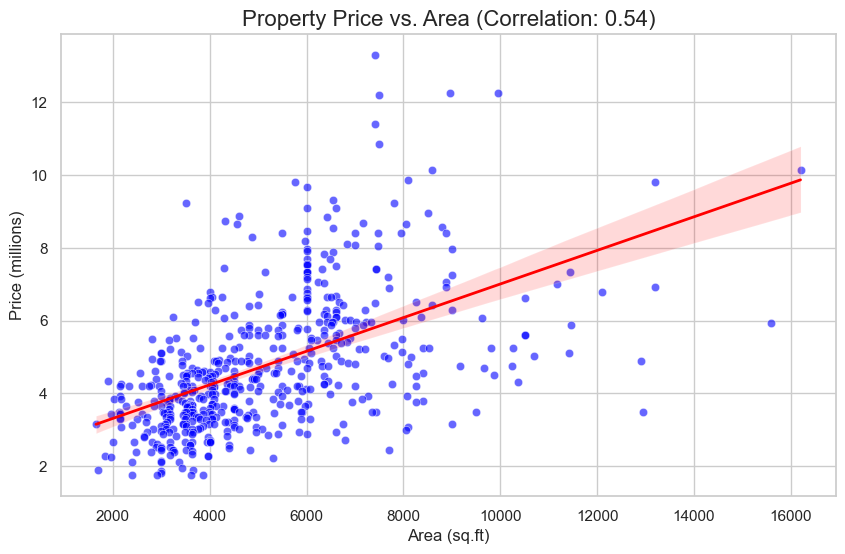

In [18]:
corr = df['price'].corr(df['area'])
print(f"Correlation between price and area: {corr:.2f}")

fig1 = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area', y='price_millions', alpha=0.6, color='blue')
sns.regplot(data=df, x='area', y='price_millions', scatter=False, color='red', line_kws={'linewidth': 2})

plt.title(f'Property Price vs. Area (Correlation: {corr:.2f})', fontsize=16)
plt.xlabel('Area (sq.ft)', fontsize=12)
plt.ylabel('Price (millions)', fontsize=12)

plt.show()

## How do number of bedrooms and bathrooms affect the price?
### Bedrooms & Bathrooms

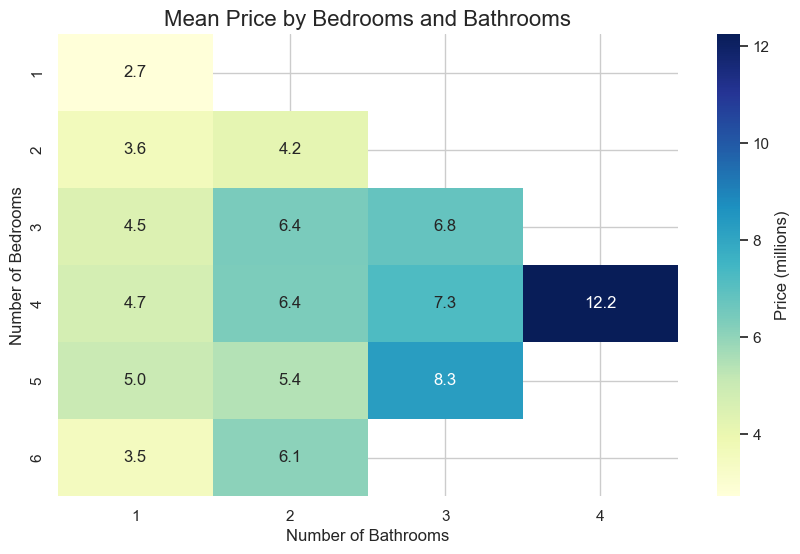

In [12]:
pivot_table = df.pivot_table(values='price_millions', index='bedrooms', columns='bathrooms', aggfunc='mean')

fig2 = plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Price (millions)'})

plt.title('Mean Price by Bedrooms and Bathrooms', fontsize=16)
plt.xlabel('Number of Bathrooms', fontsize=12)
plt.ylabel('Number of Bedrooms', fontsize=12)

plt.show()

## Is there a price difference based on furnishing status?
### Furnishing

/var/folders/x_/ygfbcx2x22v_09x1m6pvd6b80000gn/T/ipykernel_28893/671049866.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='furnishingstatus', y='price_millions', data=df, order=order, palette="Set2")


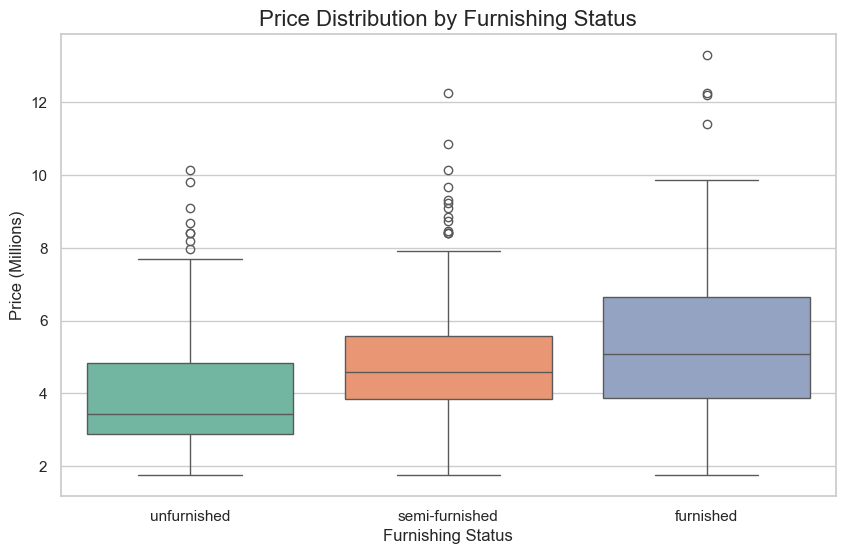

In [ ]:
fig3 = plt.figure(figsize=(10, 6))

order = ['unfurnished', 'semi-furnished', 'furnished']
sns.boxplot(x='furnishingstatus', y='price_millions', data=df, order=order, palette="Set2")

plt.title('Price Distribution by Furnishing Status', fontsize=16)
plt.xlabel('Furnishing Status', fontsize=12)
plt.ylabel('Price (Millions)', fontsize=12)

plt.show()

## Do air conditioning and guest rooms provide a noticeable bump in price?
### Premium features

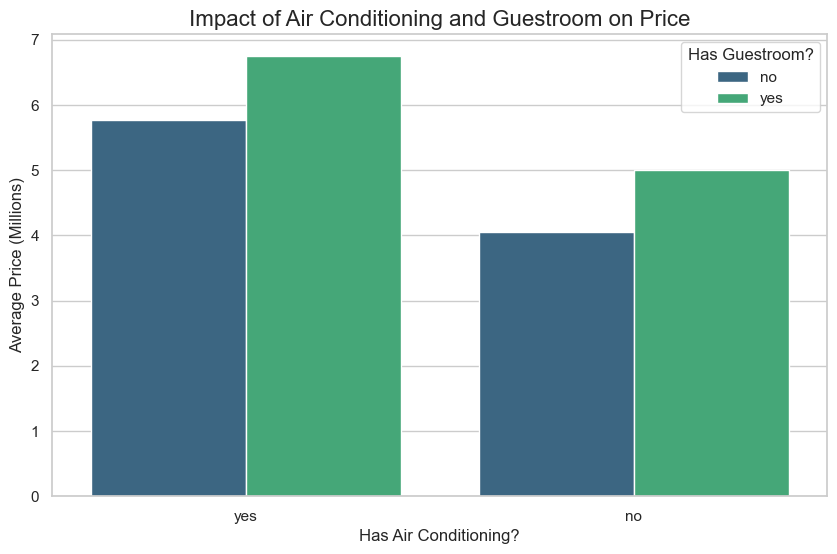

In [14]:
fig4 = plt.figure(figsize=(10, 6))

sns.barplot(x='airconditioning', y='price_millions', hue='guestroom', data=df, palette="viridis", errorbar=None)

plt.title('Impact of Air Conditioning and Guestroom on Price', fontsize=16)
plt.xlabel('Has Air Conditioning?', fontsize=12)
plt.ylabel('Average Price (Millions)', fontsize=12)
plt.legend(title='Has Guestroom?')

plt.show()

## Does being on a main road or in a preferred area correlate with higher value?
### Location and Accessability

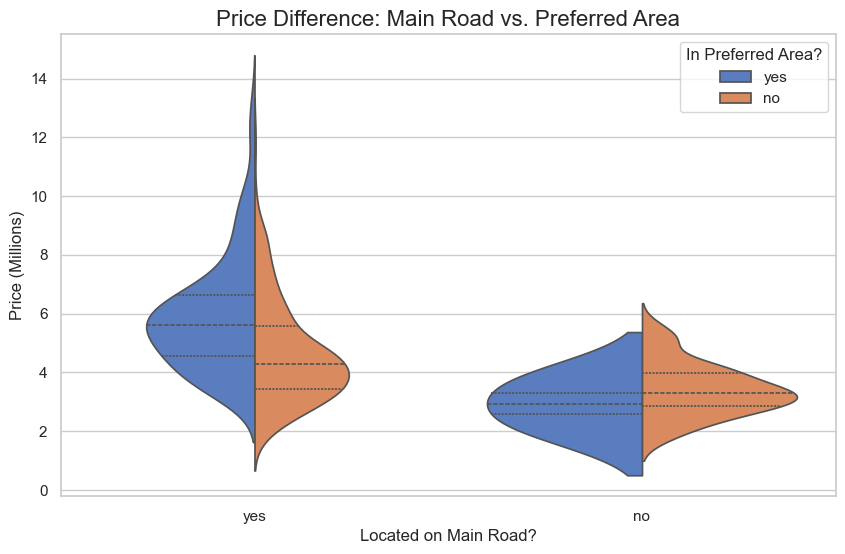

In [15]:
fig5 = plt.figure(figsize=(10, 6))

sns.violinplot(x='mainroad', y='price_millions', hue='prefarea', data=df, split=True, inner="quart", palette="muted")

plt.title('Price Difference: Main Road vs. Preferred Area', fontsize=16)
plt.xlabel('Located on Main Road?', fontsize=12)
plt.ylabel('Price (Millions)', fontsize=12)
plt.legend(title='In Preferred Area?')

plt.show()

In [62]:
fig1.savefig('Figures/1.area_vs_price_scatter.png', dpi=500, bbox_inches='tight')

fig2.savefig('Figures/2.bedrooms_bathrooms_heatmap.png', dpi=500, bbox_inches='tight')

fig3.savefig('Figures/3.furnishing_status_boxplot.png', dpi=500, bbox_inches='tight')

fig4.savefig('Figures/4.airconditioning_guestroom_barplot.png', dpi=500, bbox_inches='tight')

fig5.savefig('Figures/5.mainroad_prefarea_violinplot.png', dpi=500, bbox_inches='tight')

print("All figures saved successfully!")


All figures saved successfully!
